## Milestone 2

Chris Goodwin - DSC540

For Milestone 2, we have to clean up our flat data file. I will be using a .csv file retrieved from kaggle. The file can be retrieved [here](https://www.kaggle.com/shivamb/netflix-shows/). We will start by simply reading the file into a DataFrame.

In [1]:
import pandas as pd
file = 'netflix_titles.csv'
df = pd.read_csv(file)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Since my analysis will focus on movies, I want to create a subset of data that only consists of Movie values. In order to accomplish this, I will only select the rows where type = 'Movie'.

In [2]:
movies = df[df['type'] == 'Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


As we see via a comparison between the original DataFrame and the new one, the titles where type = 'TV Show' have been removed. 

The second thing I want to do is to focus on titles that are available by US costumers. To do this, I need to create a subset of only the rows where country contains "United States". 

In [3]:
any(movies.country.isnull())

True

From the above output, we know that country contains some null values. I am first going to drop those from our DataFrame using the following command:

In [4]:
movies = movies.dropna(subset = ['country'])

In [5]:
any(movies.country.isnull())

False

Now that the output reads "False", we know that all the NA/NaN country values have been removed. We can now create our new subset where country contains "United States".

In [6]:
movies = movies[movies['country'].str.contains("United States")]
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."


We can see now that only titles available in the United States now reside in our DataFrame. 

The next step I want to take is to re-format the actual movie titles. To avoid any discrepancies when pulling titles from different sources, I think it would be helpful to convert the titles to all lowercase. This way, we will not have to worry about inconsistencies in capitalization between sources. 

In [7]:
movies['title'] = movies['title'].str.lower()
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
9,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
11,70299204,Movie,kidnapping mr. heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."


As we continue with this analysis, it may be helpful to also remove any punctuation from our movie titles as well. I will not focus too much time on that now, but once we really start seeing how the data is scraped from websites and APIs, this may be an additional step we must take with our flat file data as well. 

Now that we have our data frame dwindled down and formatted, I want to just verify if there are any duplicates in our DataFrame. I will check this based on the title field.

In [8]:
any(movies.title.duplicated())

True

Based on that output, we see that indeed there are duplicates. We will use the drop_duplicates() function to take care of those.

In [9]:
movies = movies.drop_duplicates(subset = 'title')
any(movies.title.duplicated())

False

Hooray! Duplicates are gone. Our final step with this data is going to be to convert some of our categorical data into numerical data. I am going to add 5 new columns: action, comedy, children, thriller, and drama. In my analysis, I am going to look at different genres of movies and how they are rated on different websites. These new columns will represent 5 genres that I wish to evaluate. If the genre is contained in the listed_in variable, the value will be a 1. If not, the value of the column will be 0. I will start by initializing all of the new columns with a value of 0. 

In [10]:
movies['action'] = 0
movies['comedy'] = 0
movies['children'] = 0
movies['thriller'] = 0
movies['drama'] = 0
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,action,comedy,children,thriller,drama
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0,0,0,0,0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0,0,0,0,0
6,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",0,0,0,0,0
9,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,0,0,0,0,0
11,70299204,Movie,kidnapping mr. heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",0,0,0,0,0


We now want to replace these values based on the listed_in variable. If the listed_in variables contains the matching string, we will update our column values to 1.  After replacing the 0s with 1s, we then have to fill out the NaN values with a 0. I must admit this was not the prettiest way to accomplish this, but it worked for me!

In [11]:
movies['action'] = movies[movies['listed_in'].str.contains("Action")]['action'].replace(0,1)
movies['comedy'] = movies[movies['listed_in'].str.contains("Comed")]['comedy'].replace(0,1)
movies['children'] = movies[movies['listed_in'].str.contains("Children")]['children'].replace(0,1)
movies['thriller'] = movies[movies['listed_in'].str.contains("Thriller")]['thriller'].replace(0,1)
movies['drama'] = movies[movies['listed_in'].str.contains("Drama")]['drama'].replace(0,1)
movies.fillna(0, inplace = True)
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,action,comedy,children,thriller,drama
0,81145628,Movie,norm of the north: king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0.0,1.0,1.0,0.0,0.0
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0.0,1.0,0.0,0.0,0.0
6,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",0.0,0.0,0.0,1.0,0.0
9,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,1.0,0.0,0.0,1.0,0.0
11,70299204,Movie,kidnapping mr. heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",1.0,0.0,0.0,0.0,1.0


And voila, we now have our DataFrame ready to go to continue our analysis!

## Milestone 3

Now that we have our data, we will use it to help us scrape some information from Rotten Tomatoes.

To start, we are going to remove punctuation from our movie titles. This will help us when we need to build our URLs. 

In [12]:
movies['title'] = movies['title'].str.replace(r'[^\w\s]+', '')

In order to build our URLs for Rotten Tomatoes, we need the name of the movie and the release year. To accomplish this, we will create a dictionary with these two values.

In [13]:
movie_dict = pd.Series(movies.release_year.values,index=movies.title).to_dict()
movie_dict

{'norm of the north king sized adventure': 2019,
 'realityhigh': 2017,
 'automata': 2014,
 'good people': 2014,
 'kidnapping mr heineken': 2015,
 'manhattan romance': 2014,
 'rolling papers': 2015,
 'stonehearst asylum': 2014,
 'the runner': 2015,
 '6 years': 2015,
 'city of joy': 2018,
 'next gen': 2018,
 'sierra burgess is a loser': 2018,
 'the most assassinated woman in the world': 2018,
 'hell and back': 2015,
 'atm': 2012,
 'carrie pilby': 2016,
 'marc maron too real': 2017,
 'the world we make': 2019,
 'black panther': 2018,
 'big miracle': 2012,
 'amanda knox': 2016,
 'the debt collector': 2018,
 'act of vengeance': 2010,
 'geralds game': 2017,
 'long shot': 2017,
 'our souls at night': 2017,
 'monster high boo york boo york': 2015,
 'hold the dark': 2018,
 'lessons from a school shooting notes from dunblane': 2018,
 'in the shadow of the moon': 2019,
 'sturgill simpson presents sound  fury': 2019,
 'joseph king of dreams': 2000,
 'the hurricane heist': 2018,
 'def comedy jam 25

To avoid the computational effort today, I am only going to do this for 10 movies to start, and then will complete the rest when I do my final analysis. 

In [24]:
#first10pairs = {k: movie_dict[k] for k in list(movie_dict)[:10]}
#first10pairs

{'norm of the north king sized adventure': 2019,
 'realityhigh': 2017,
 'automata': 2014,
 'good people': 2014,
 'kidnapping mr heineken': 2015,
 'manhattan romance': 2014,
 'rolling papers': 2015,
 'stonehearst asylum': 2014,
 'the runner': 2015,
 '6 years': 2015}

Now we have to build our URL. Doing some searching, the Rotten Tomatoes URL is in the format https://www.rottentomatoes.com/m/movie_title_with_spaces or https://www.rottentomatoes.com/m/movie_title_with_spaces_year. We will try both to see if we can obtain the ratings we need. 

In [14]:
from bs4 import BeautifulSoup
import requests
import re

def get_request(movie_name, dict_name):
    tomato_base_url = 'https://www.rottentomatoes.com/m/'
    try:
        moviename_url = tomato_base_url + re.sub(' ', '_', str(movie_name))
        year = str(dict_name[movie_name])
        final_url = moviename_url + '_' + year
        r = requests.get(final_url)
        r.raise_for_status()
    except requests.exceptions.HTTPError as err:
        final_url = tomato_base_url + re.sub(' ', '_', str(movie_name))
        r = requests.get(final_url)
    return r

Now that we have created our function to get the request, we have to obtain the reviews. We use BeautifulSoup's findall() function to find the ratings. We then append these ratings to a list for each movie (there can be up to two - critic score and audience score), and create a new dictionary with reviews. I had to do some formatting because the percentages were surrounded by spaces and new-line characters. 

In [17]:
review_dict = {}
for movie in movie_dict:
    r = get_request(movie, movie_dict)
    soup = BeautifulSoup(r.text)
    scores_text = soup.findAll("span", {"class": "mop-ratings-wrap__percentage"})
    #review_dict = {}
    review_list = []
    for score in scores_text:
        #review_list = []
        review = score.get_text()
        review = review.replace(' ', '')
        review = review.replace('\n', '')
        review_list.append(review)
        review_dict[movie] = review_list
print(review_dict)

{'norm of the north king sized adventure': ['36%'], 'realityhigh': ['40%', '52%'], 'automata': ['30%', '30%'], 'good people': ['12%', '22%'], 'kidnapping mr heineken': ['19%', '23%'], 'manhattan romance': ['58%'], 'stonehearst asylum': ['54%', '49%'], '6 years': ['69%', '34%'], 'city of joy': ['100%', '60%'], 'next gen': ['80%', '68%'], 'sierra burgess is a loser': ['61%', '31%'], 'the most assassinated woman in the world': ['86%', '33%'], 'hell and back': ['34%'], 'atm': ['12%', '23%'], 'carrie pilby': ['62%', '73%'], 'marc maron too real': ['80%', '65%'], 'the world we make': ['53%'], 'black panther': ['97%', '79%'], 'big miracle': ['75%', '64%'], 'amanda knox': ['82%', '71%'], 'the debt collector': ['83%', '44%'], 'act of vengeance': ['54%'], 'geralds game': ['91%', '71%'], 'long shot': ['85%'], 'our souls at night': ['90%', '75%'], 'monster high boo york boo york': ['82%'], 'hold the dark': ['70%', '31%'], 'lessons from a school shooting notes from dunblane': ['80%'], 'in the shado

Now there is a lot to unpack from these movies. At just a quick glance, we can see that there are some movies that yielded no reviews. Let's take a look at two different examples- Rolling Papers and The Runner. For Rolling Papers, there is a discrepancy in the release year. In our database, it is 2015. On Rotten Tomatoes, it is 2016. So the URL we built did not work, and therefore we could not scrape any reviews. For The Runner, the release dates match up between the sources, but for some reason the Rotten Tomatoes URL for this movie is https://www.rottentomatoes.com/m/the_runner_1999. There is really nothing I can do about these errors, at least at my level of programming capabilities. I am going to eventually drop these films from our DataFrame.

Next, we have the movies where we were able to scrape the review percentages. The easiest ones will be where we retrieved two percentages- the first is the critic's score, the second is the audience score. There are also a couple where we only received one percentage value. Based on my review of the site, these will always be audience scores. In other words, for these movies, there are no critic reviews. For the sake of this analysis, I am just going to copy the audience score into the critic score slot. I may decide to drop them altogether at some point if I feel like it is hindering my analysis, but for now I think this is the best option. 

In [18]:
for movie in review_dict:
    list1 = review_dict[movie]
    if len(list1) == 1:
        list1.insert(0, list1[0])
        review_dict[movie] = list1
print(review_dict)

{'norm of the north king sized adventure': ['36%', '36%'], 'realityhigh': ['40%', '52%'], 'automata': ['30%', '30%'], 'good people': ['12%', '22%'], 'kidnapping mr heineken': ['19%', '23%'], 'manhattan romance': ['58%', '58%'], 'stonehearst asylum': ['54%', '49%'], '6 years': ['69%', '34%'], 'city of joy': ['100%', '60%'], 'next gen': ['80%', '68%'], 'sierra burgess is a loser': ['61%', '31%'], 'the most assassinated woman in the world': ['86%', '33%'], 'hell and back': ['34%', '34%'], 'atm': ['12%', '23%'], 'carrie pilby': ['62%', '73%'], 'marc maron too real': ['80%', '65%'], 'the world we make': ['53%', '53%'], 'black panther': ['97%', '79%'], 'big miracle': ['75%', '64%'], 'amanda knox': ['82%', '71%'], 'the debt collector': ['83%', '44%'], 'act of vengeance': ['54%', '54%'], 'geralds game': ['91%', '71%'], 'long shot': ['85%', '85%'], 'our souls at night': ['90%', '75%'], 'monster high boo york boo york': ['82%', '82%'], 'hold the dark': ['70%', '31%'], 'lessons from a school shoo

Now that we have our final dictionary, we need to convert it into a DataFrame. We simply do this using the .from_dict() function.

In [19]:
review_df = pd.DataFrame.from_dict(review_dict, columns = ['critic_score', 'audience_score'], orient = 'index')
review_df

,critic_score,audience_score
norm of the north king sized adventure,36%,36%
realityhigh,40%,52%
automata,30%,30%
good people,12%,22%
kidnapping mr heineken,19%,23%
...,...,...
life 20,89%,56%
silicon cowboys,100%,73%
the bad kids,100%,83%
frank and cindy,94%,94%


In [55]:
movies_total = movies.set_index('title', drop = False).join(review_df)
movies_total.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,action,comedy,children,thriller,drama,critic_score,audience_score
title,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0.0,1.0,1.0,0.0,0.0,36%,36%
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0.0,1.0,0.0,0.0,0.0,40%,52%
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",0.0,0.0,0.0,1.0,0.0,30%,30%
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,1.0,0.0,0.0,1.0,0.0,12%,22%
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",1.0,0.0,0.0,0.0,1.0,19%,23%
manhattan romance,80060297,Movie,manhattan romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,0.0,1.0,0.0,0.0,0.0,58%,58%
rolling papers,80046727,Movie,rolling papers,Mitch Dickman,0,"United States, Uruguay","September 8, 2017",2015,TV-MA,79 min,Documentaries,"As the newspaper industry takes a hit, The Den...",0.0,0.0,0.0,0.0,0.0,NaN,NaN
stonehearst asylum,70304988,Movie,stonehearst asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,"September 8, 2017",2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",0.0,0.0,0.0,1.0,0.0,54%,49%
the runner,80057700,Movie,the runner,Austin Stark,"Nicolas Cage, Sarah Paulson, Connie Nielsen, W...",United States,"September 8, 2017",2015,R,90 min,"Dramas, Independent Movies",A New Orleans politician finds his idealistic ...,0.0,0.0,0.0,0.0,1.0,NaN,NaN


As we can see, using the join the reviews now appear in our DataFrame! Now there are a couple options for how we can proceed with this data. First, I am going to remove all records where both critic score and audience score are null. This will eliminate most movies for now, but once I go back and apply these functions and programs on every movie, there will be many more. Mostly I just want to test that the two movies that we know did not have reviews are eliminated. 

In [56]:
movies_total = movies_total.dropna(subset=['critic_score', 'audience_score'], how='all')
movies_total.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,action,comedy,children,thriller,drama,critic_score,audience_score
title,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,0.0,1.0,1.0,0.0,0.0,36%,36%
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,0.0,1.0,0.0,0.0,0.0,40%,52%
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",0.0,0.0,0.0,1.0,0.0,30%,30%
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,1.0,0.0,0.0,1.0,0.0,12%,22%
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",1.0,0.0,0.0,0.0,1.0,19%,23%
manhattan romance,80060297,Movie,manhattan romance,Tom O'Brien,"Tom O'Brien, Katherine Waterston, Caitlin Fitz...",United States,"September 8, 2017",2014,TV-14,98 min,"Comedies, Independent Movies, Romantic Movies",A filmmaker working on a documentary about lov...,0.0,1.0,0.0,0.0,0.0,58%,58%
stonehearst asylum,70304988,Movie,stonehearst asylum,Brad Anderson,"Kate Beckinsale, Jim Sturgess, David Thewlis, ...",United States,"September 8, 2017",2014,PG-13,113 min,"Horror Movies, Thrillers","In 1899, a young doctor arrives at an asylum f...",0.0,0.0,0.0,1.0,0.0,54%,49%
6 years,80045922,Movie,6 years,Hannah Fidell,"Taissa Farmiga, Ben Rosenfield, Lindsay Burdge...",United States,"September 8, 2015",2015,NR,80 min,"Dramas, Independent Movies, Romantic Movies",As a volatile young couple who have been toget...,0.0,0.0,0.0,0.0,1.0,69%,34%
city of joy,80203094,Movie,city of joy,Madeleine Gavin,0,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,0.0,0.0,0.0,0.0,0.0,100%,60%


And just like that, The Runner and Rolling Papers are no more! Now another step we can take is to convert these values to numerics. I will run dtypes to show that these new columns are objects. Because of this, I first have to convert them to strings, replace the percent sign, and then convert to numeric. 

In [57]:
movies_total.dtypes

show_id             int64
type               object
title              object
director           object
cast               object
country            object
date_added         object
release_year        int64
rating             object
duration           object
listed_in          object
description        object
action            float64
comedy            float64
children          float64
thriller          float64
drama             float64
critic_score       object
audience_score     object
dtype: object

In [58]:
movies_total['critic_score_numeric'] = movies_total['critic_score'].astype('str')
movies_total['critic_score_numeric'] = movies_total['critic_score_numeric'].str.replace('%','')
movies_total['critic_score_numeric'] = pd.to_numeric(movies_total['critic_score_numeric'])
movies_total['audience_score_numeric'] = movies_total['audience_score'].astype('str')
movies_total['audience_score_numeric'] = movies_total['audience_score_numeric'].str.replace('%','')
movies_total['audience_score_numeric'] = pd.to_numeric(movies_total['audience_score_numeric'])
movies_total.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,action,comedy,children,thriller,drama,critic_score,audience_score,critic_score_numeric,audience_score_numeric
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,Before planning an awesome wedding for his gra...,0.0,1.0,1.0,0.0,0.0,36%,36%,36,36
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,When nerdy high schooler Dani finally attracts...,0.0,1.0,0.0,0.0,0.0,40%,52%,40,52
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,"In a dystopian future, an insurance adjuster f...",0.0,0.0,0.0,1.0,0.0,30%,30%,30,30
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,A struggling couple can't believe their luck w...,1.0,0.0,0.0,1.0,0.0,12%,22%,12,22
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,"When beer magnate Alfred ""Freddy"" Heineken is ...",1.0,0.0,0.0,0.0,1.0,19%,23%,19,23


We know have numerical values for our two new columns! Another route one might choose to take is to "normalize" our data somewhat. We may down the line want to compare this to something that is on a five star scale. To get it on this scale, we can divide our values by 5. 

In [59]:
movies_total['critic_score_normal'] = movies_total['critic_score_numeric'] / 20.0
movies_total['audience_score_normal'] = movies_total['audience_score_numeric'] / 20.0
movies_total.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,comedy,children,thriller,drama,critic_score,audience_score,critic_score_numeric,audience_score_numeric,critic_score_normal,audience_score_normal
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,1.0,1.0,0.0,0.0,36%,36%,36,36,1.80,1.80
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,1.0,0.0,0.0,0.0,40%,52%,40,52,2.00,2.60
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,0.0,1.0,0.0,30%,30%,30,30,1.50,1.50
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,0.0,1.0,0.0,12%,22%,12,22,0.60,1.10
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,0.0,0.0,0.0,1.0,19%,23%,19,23,0.95,1.15


One final step that I am realizing now is that I should probably reference Rotten Tomatoes in these column headers. 

In [60]:
movies_total.rename(columns={'critic_score':'critic_score_RT',
                             'audience_score':'audience_score_RT',
                             'critic_score_numeric':'critic_score_numeric_RT',
                             'audience_score_numeric':'audience_score_numeric_RT',
                             'critic_score_normal':'critic_score_normal_RT',
                             'audience_score_normal':'audience_score_normal_RT'}, 
                             inplace=True)
movies_total.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,comedy,children,thriller,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,1.0,1.0,0.0,0.0,36%,36%,36,36,1.80,1.80
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,1.0,0.0,0.0,0.0,40%,52%,40,52,2.00,2.60
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,0.0,1.0,0.0,30%,30%,30,30,1.50,1.50
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,0.0,1.0,0.0,12%,22%,12,22,0.60,1.10
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,0.0,0.0,0.0,1.0,19%,23%,19,23,0.95,1.15


And there we have it, we have successfully scraped some information from Rotten Tomatoes!

## Milestone 4

Next, we will access the data we need from our API. I will be using the OMDB API, which retrieves information about movies. Even better is that we actually used the same API in our homework assignment this week, so I have some extra experience!

First step will be building the URL so we can get the data we need. The format of the URL is http://www.omdbapi.com/?apikey=[yourkey]& for movie information. After the '&', we will be including 't=movie_title'. So in order to build our url for the data retrieval, we will use the following: 

In [26]:
import urllib.request, urllib.parse, urllib.error
import json

In [27]:
base_url = 'http://www.omdbapi.com/?apikey=8f4de95d&t='

Now we have to write a code that will retrieve the movie information. We will use this using urllib to request and open the URL, and then use the json package to get our data. For now, I am going to print the json result so we know what we are working with. 

In [28]:
def get_ratings_dev(title):
    url = base_url + urllib.parse.quote(str(title))
    url_open = urllib.request.urlopen(url)
    data = url_open.read()
    json_data = json.loads(data)
    return json_data

We will just run this on a practice movie, "Titanic", to see what our results are.

In [29]:
get_ratings_dev("Titanic")

{'Title': 'Titanic',
 'Year': '1997',
 'Rated': 'PG-13',
 'Released': '19 Dec 1997',
 'Runtime': '194 min',
 'Genre': 'Drama, Romance',
 'Director': 'James Cameron',
 'Writer': 'James Cameron',
 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates',
 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'Language': 'English, Swedish, Italian',
 'Country': 'USA',
 'Awards': 'Won 11 Oscars. Another 114 wins & 83 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '89%'},
  {'Source': 'Metacritic', 'Value': '75/100'}],
 'Metascore': '75',
 'imdbRating': '7.8',
 'imdbVotes': '1,004,959',
 'imdbID': 'tt0120338',
 'Type': 'movie',
 'DVD': 'N/A',
 'BoxOffice': 'N/A',
 'Production': '

Alright, this is a great start. We have an example output that we can look at. From this API, I wish to retrieve the IMDb Rating. This is stored in the field "imdbRating".

In [30]:
def get_imdb(title):
    url = base_url + urllib.parse.quote(str(title))
    url_open = urllib.request.urlopen(url)
    data = url_open.read()
    json_data = json.loads(data)
    imdb = json_data['imdbRating']
    return imdb

Once again, we will test our function on "Titanic"

In [31]:
get_imdb("Titanic")

'7.8'

Perfect! This is the value we wanted. Now similarly to our HTML data, we are going to want to create a dictionary. We have our movies in the DataFrame movies_total, and the titles are stored in the variable 'title'

In [35]:
import numpy as np

In [36]:
imdb_dict = {}
for movie in movies_total['title']:
    try:
        rating = get_imdb(movie)
        imdb_dict[movie] = rating
    except:
        imdb_dict[movie] = np.nan

In [37]:
imdb_dict

{'norm of the north king sized adventure': '3.1',
 'realityhigh': '5.2',
 'automata': '6.1',
 'good people': '5.5',
 'kidnapping mr heineken': '6.1',
 'manhattan romance': '5.6',
 'stonehearst asylum': '6.8',
 '6 years': '5.6',
 'city of joy': '6.5',
 'next gen': '6.6',
 'sierra burgess is a loser': '5.9',
 'the most assassinated woman in the world': '5.3',
 'hell and back': '5.4',
 'atm': '4.7',
 'carrie pilby': '6.6',
 'marc maron too real': '7.2',
 'the world we make': '5.1',
 'black panther': '7.3',
 'big miracle': '6.5',
 'amanda knox': '6.9',
 'the debt collector': '5.7',
 'act of vengeance': '5.5',
 'geralds game': nan,
 'long shot': '6.8',
 'our souls at night': '6.9',
 'monster high boo york boo york': '6.5',
 'hold the dark': '5.6',
 'lessons from a school shooting notes from dunblane': nan,
 'in the shadow of the moon': '6.2',
 'joseph king of dreams': '6.5',
 'the hurricane heist': '5.1',
 'def comedy jam 25': '6.6',
 'restless creature wendy whelan': '7.1',
 'print the leg

Perfect! We have a dictionary will all of our movies, and their corresponding IMDb ratings. Once again, we want to turn this into a DataFrame, and join it to ours.

In [38]:
imdb_df = pd.DataFrame.from_dict(imdb_dict, columns = ['imdb_score'], orient = 'index')
imdb_df

,imdb_score
norm of the north king sized adventure,3.1
realityhigh,5.2
automata,6.1
good people,5.5
kidnapping mr heineken,6.1
...,...
life 20,NaN
silicon cowboys,NaN
the bad kids,NaN
frank and cindy,NaN


In [61]:
movies_total = movies_total.join(imdb_df)
movies_total

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,children,thriller,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,1.0,0.0,0.0,36%,36%,36,36,1.80,1.80,3.1
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,0.0,0.0,40%,52%,40,52,2.00,2.60,5.2
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,1.0,0.0,30%,30%,30,30,1.50,1.50,6.1
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,1.0,0.0,12%,22%,12,22,0.60,1.10,5.5
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,0.0,0.0,1.0,19%,23%,19,23,0.95,1.15,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
life 20,70129457,Movie,life 20,Jason Spingarn-Koff,0,United States,"April 1, 2017",2010,NR,99 min,...,0.0,0.0,0.0,89%,56%,89,56,4.45,2.80,NaN
silicon cowboys,80104318,Movie,silicon cowboys,Jason Cohen,0,United States,"April 1, 2017",2016,TV-PG,77 min,...,0.0,0.0,0.0,100%,73%,100,73,5.00,3.65,NaN
the bad kids,80097468,Movie,the bad kids,"Keith Fulton, Louis Pepe",0,United States,"April 1, 2017",2016,TV-MA,101 min,...,0.0,0.0,0.0,100%,83%,100,83,5.00,4.15,NaN


Perfect, we have our scores! Now what do we do from here? First, we will drop any movies for which we were unable to obtain a score for. 

In [62]:
movies_total = movies_total.dropna(subset=['imdb_score'])
movies_total

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,children,thriller,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,1.0,0.0,0.0,36%,36%,36,36,1.80,1.80,3.1
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,0.0,0.0,40%,52%,40,52,2.00,2.60,5.2
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,1.0,0.0,30%,30%,30,30,1.50,1.50,6.1
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,1.0,0.0,12%,22%,12,22,0.60,1.10,5.5
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,0.0,0.0,1.0,19%,23%,19,23,0.95,1.15,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
high flying bird,80991400,Movie,high flying bird,Steven Soderbergh,"André Holland, Zazie Beetz, Bill Duke, Kyle Ma...",United States,"February 8, 2019",2019,TV-MA,91 min,...,0.0,0.0,1.0,93%,46%,93,46,4.65,2.30,6.2
remastered the two killings of sam cooke,80191045,Movie,remastered the two killings of sam cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,...,0.0,0.0,0.0,100%,100%,100,100,5.00,5.00,7.2
blinky bill the movie,80119555,Movie,blinky bill the movie,Deane Taylor,"Ryan Kwanten, Rufus Sewell, Toni Collette, Rob...","Australia, United States","February 8, 2017",2015,PG,91 min,...,1.0,0.0,0.0,73%,43%,73,43,3.65,2.15,5.0


Now while this dropped most of our NaN values, there are still some movies where the IMDb rating is actually equal to the string "N/A". Let us take a look at those:

In [64]:
movies_total[movies_total["imdb_score"] == "N/A"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,children,thriller,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
surfs up,70058025,Movie,surfs up,"Ash Brannon, Chris Buck","Shia LaBeouf, Jeff Bridges, Zooey Deschanel, J...",United States,"October 1, 2019",2007,PG,86 min,...,1.0,0.0,0.0,79%,70%,79,70,3.95,3.50,N/A
my suicide,70114948,Movie,my suicide,David Lee Miller,"Gabriel Sunday, David Carradine, Mariel Heming...",United States,"October 1, 2018",2009,NR,111 min,...,0.0,0.0,1.0,57%,81%,57,81,2.85,4.05,N/A
hard lessons,60022914,Movie,hard lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,"October 1, 2011",1986,NR,94 min,...,0.0,0.0,1.0,51%,51%,51,51,2.55,2.55,N/A
187,26597413,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,...,0.0,0.0,1.0,30%,67%,30,67,1.50,3.35,N/A
stink,80076581,Movie,stink,Jon J. Whelan,Jeffrey Hollender,United States,"November 1, 2018",2015,TV-PG,91 min,...,0.0,0.0,0.0,89%,62%,89,62,4.45,3.10,N/A
dr seuss the cat in the hat,60031264,Movie,dr seuss the cat in the hat,Bo Welch,"Mike Myers, Alec Baldwin, Kelly Preston, Dakot...",United States,"May 1, 2019",2003,PG,82 min,...,1.0,0.0,0.0,9%,50%,9,50,0.45,2.50,N/A
the inlaws,60027701,Movie,the inlaws,Andrew Fleming,"Michael Douglas, Albert Brooks, Robin Tunney, ...","United States, Germany, Canada","July 1, 2019",2003,PG-13,98 min,...,0.0,0.0,0.0,87%,83%,87,83,4.35,4.15,N/A


Now for the sake of our analysis here, we want to drop these as well. We will create a subset of this DataFrame for all entries where imdb_score is NOT equal to "N/A"

In [65]:
movies_total = movies_total[movies_total["imdb_score"] != "N/A"]
movies_total

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,children,thriller,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,imdb_score
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,1.0,0.0,0.0,36%,36%,36,36,1.80,1.80,3.1
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,0.0,0.0,40%,52%,40,52,2.00,2.60,5.2
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,1.0,0.0,30%,30%,30,30,1.50,1.50,6.1
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,1.0,0.0,12%,22%,12,22,0.60,1.10,5.5
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,0.0,0.0,1.0,19%,23%,19,23,0.95,1.15,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
high flying bird,80991400,Movie,high flying bird,Steven Soderbergh,"André Holland, Zazie Beetz, Bill Duke, Kyle Ma...",United States,"February 8, 2019",2019,TV-MA,91 min,...,0.0,0.0,1.0,93%,46%,93,46,4.65,2.30,6.2
remastered the two killings of sam cooke,80191045,Movie,remastered the two killings of sam cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,...,0.0,0.0,0.0,100%,100%,100,100,5.00,5.00,7.2
blinky bill the movie,80119555,Movie,blinky bill the movie,Deane Taylor,"Ryan Kwanten, Rufus Sewell, Toni Collette, Rob...","Australia, United States","February 8, 2017",2015,PG,91 min,...,1.0,0.0,0.0,73%,43%,73,43,3.65,2.15,5.0


We have now removed the 7, and are left with 918 total movies. When all is said and done I am happy with this number, and think this gives us a good spot to work on our analysis. 

Once again we can check the type of data that the IMDb score is, and convert it to numeric. 

In [66]:
movies_total.dtypes

show_id                        int64
type                          object
title                         object
director                      object
cast                          object
country                       object
date_added                    object
release_year                   int64
rating                        object
duration                      object
listed_in                     object
description                   object
action                       float64
comedy                       float64
children                     float64
thriller                     float64
drama                        float64
critic_score_RT               object
audience_score_RT             object
critic_score_numeric_RT        int64
audience_score_numeric_RT      int64
critic_score_normal_RT       float64
audience_score_normal_RT     float64
imdb_score                    object
dtype: object

It is an object. We want to convert that to numeric.

In [67]:
movies_total['imdb_score_numeric'] = movies_total['imdb_score'].astype('str')
movies_total['imdb_score_numeric'] = pd.to_numeric(movies_total['imdb_score_numeric'])
movies_total.dtypes

C:\Users\goodw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\goodw\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


show_id                        int64
type                          object
title                         object
director                      object
cast                          object
country                       object
date_added                    object
release_year                   int64
rating                        object
duration                      object
listed_in                     object
description                   object
action                       float64
comedy                       float64
children                     float64
thriller                     float64
drama                        float64
critic_score_RT               object
audience_score_RT             object
critic_score_numeric_RT        int64
audience_score_numeric_RT      int64
critic_score_normal_RT       float64
audience_score_normal_RT     float64
imdb_score                    object
imdb_score_numeric           float64
dtype: object

Perfect, we know have a float! Another thing we can do is to once again normalize this data. For Rotten Tomatoes, we normalized on a scale of 1-5. In order to do this on IMDb, we will divide our values by 2.

In [68]:
movies_total["imdb_score_normal"] = movies_total['imdb_score_numeric'] / 2
movies_total

C:\Users\goodw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,imdb_score,imdb_score_numeric,imdb_score_normal
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,0.0,36%,36%,36,36,1.80,1.80,3.1,3.1,1.55
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,40%,52%,40,52,2.00,2.60,5.2,5.2,2.60
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,30%,30%,30,30,1.50,1.50,6.1,6.1,3.05
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,12%,22%,12,22,0.60,1.10,5.5,5.5,2.75
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,1.0,19%,23%,19,23,0.95,1.15,6.1,6.1,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
high flying bird,80991400,Movie,high flying bird,Steven Soderbergh,"André Holland, Zazie Beetz, Bill Duke, Kyle Ma...",United States,"February 8, 2019",2019,TV-MA,91 min,...,1.0,93%,46%,93,46,4.65,2.30,6.2,6.2,3.10
remastered the two killings of sam cooke,80191045,Movie,remastered the two killings of sam cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,...,0.0,100%,100%,100,100,5.00,5.00,7.2,7.2,3.60
blinky bill the movie,80119555,Movie,blinky bill the movie,Deane Taylor,"Ryan Kwanten, Rufus Sewell, Toni Collette, Rob...","Australia, United States","February 8, 2017",2015,PG,91 min,...,0.0,73%,43%,73,43,3.65,2.15,5.0,5.0,2.50


Perfect! Now we can not only compare between movies, but also compare different site's ratings of the same movie! I am going to rename my column headers to be consistent with the Rotten Tomatoes data. IMDb appears to be an audience rating, so I will rename it as such.

In [69]:
movies_total.rename(columns={'imdb_score':'audience_score_imdb',
                             'imdb_score_numeric':'audience_score_numeric_imdb',
                             'imdb_score_normal':'audience_score_normal_imdb'}, 
                             inplace=True)
movies_total

C:\Users\goodw\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,audience_score_imdb,audience_score_numeric_imdb,audience_score_normal_imdb
title,,,,,,,,,,,,,,,,,,,,,
norm of the north king sized adventure,81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,0.0,36%,36%,36,36,1.80,1.80,3.1,3.1,1.55
realityhigh,80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,0.0,40%,52%,40,52,2.00,2.60,5.2,5.2,2.60
automata,70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,...,0.0,30%,30%,30,30,1.50,1.50,6.1,6.1,3.05
good people,70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,...,0.0,12%,22%,12,22,0.60,1.10,5.5,5.5,2.75
kidnapping mr heineken,70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,...,1.0,19%,23%,19,23,0.95,1.15,6.1,6.1,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
high flying bird,80991400,Movie,high flying bird,Steven Soderbergh,"André Holland, Zazie Beetz, Bill Duke, Kyle Ma...",United States,"February 8, 2019",2019,TV-MA,91 min,...,1.0,93%,46%,93,46,4.65,2.30,6.2,6.2,3.10
remastered the two killings of sam cooke,80191045,Movie,remastered the two killings of sam cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,...,0.0,100%,100%,100,100,5.00,5.00,7.2,7.2,3.60
blinky bill the movie,80119555,Movie,blinky bill the movie,Deane Taylor,"Ryan Kwanten, Rufus Sewell, Toni Collette, Rob...","Australia, United States","February 8, 2017",2015,PG,91 min,...,0.0,73%,43%,73,43,3.65,2.15,5.0,5.0,2.50


And voila, we have it! In this milestone we have created a function to obtain IMDb ratings for a given movie, taken those IMDb scores and converting them from object to string to numeric. We then normalized that numeric value to be on the same scale as the Rotten Tomatoes scores. We then renamed the column headers in order to maintain consistency in our data. 

## Milestone 5

At last, we have made it to our final destination! We downloaded files, we scraped webpages, we conquered APIs, and now we are left with one giant DataFrame to work with. Our first mission is to convert this DataFrame into a SQLite database. 

In [70]:
import sqlite3

In [71]:
cnx = sqlite3.connect(':memory:')

Before we create a SQLite table from our DataFrame, we need to correct one thing. To join all of the data, we needed to set the index to the movie title. However, in order to remove the duplicated columns, I am going to go ahead and make the show_id the index again.

In [75]:
movies_total = movies_total.set_index('show_id')
movies_total

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,drama,critic_score_RT,audience_score_RT,critic_score_numeric_RT,audience_score_numeric_RT,critic_score_normal_RT,audience_score_normal_RT,audience_score_imdb,audience_score_numeric_imdb,audience_score_normal_imdb
show_id,,,,,,,,,,,,,,,,,,,,,
81145628,Movie,norm of the north king sized adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",...,0.0,36%,36%,36,36,1.80,1.80,3.1,3.1,1.55
80125979,Movie,realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,...,0.0,40%,52%,40,52,2.00,2.60,5.2,5.2,2.60
70304989,Movie,automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",...,0.0,30%,30%,30,30,1.50,1.50,6.1,6.1,3.05
70304990,Movie,good people,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",...,0.0,12%,22%,12,22,0.60,1.10,5.5,5.5,2.75
70299204,Movie,kidnapping mr heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies",...,1.0,19%,23%,19,23,0.95,1.15,6.1,6.1,3.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80991400,Movie,high flying bird,Steven Soderbergh,"André Holland, Zazie Beetz, Bill Duke, Kyle Ma...",United States,"February 8, 2019",2019,TV-MA,91 min,"Dramas, Sports Movies",...,1.0,93%,46%,93,46,4.65,2.30,6.2,6.2,3.10
80191045,Movie,remastered the two killings of sam cooke,Kelly Duane de la Vega,Sam Cooke,United States,"February 8, 2019",2019,TV-MA,74 min,"Documentaries, Music & Musicals",...,0.0,100%,100%,100,100,5.00,5.00,7.2,7.2,3.60
80119555,Movie,blinky bill the movie,Deane Taylor,"Ryan Kwanten, Rufus Sewell, Toni Collette, Rob...","Australia, United States","February 8, 2017",2015,PG,91 min,Children & Family Movies,...,0.0,73%,43%,73,43,3.65,2.15,5.0,5.0,2.50


We then simply just have to use the pandas to_sql function to convert our data into a table. From here on out, we will execute our select statements using the cnx connection we established.

In [76]:
movies_total.to_sql(name = 'movies_total', con = cnx)

Now we create our plots. The first plot I thought would be interesting to look at is an overall breakdown of IMDb scores. By plotting a histogram of the scores, we can see how these movies are distributed.

In order to create this plot, we will have to obtain all of the IMDb scores from our database. These are stored in the audience_score_numeric_imdb field in the movies_total table. We will create a list to store all of these variables, and then use matplotlib to create our plot.

In [80]:
task_1 = cnx.execute('select audience_score_numeric_imdb from movies_total')
imdb_scores = []
for row in task_1:
    imdb_scores.append(row[0])
imdb_scores

[3.1,
 5.2,
 6.1,
 5.5,
 6.1,
 5.6,
 6.8,
 5.6,
 6.5,
 6.6,
 5.9,
 5.3,
 5.4,
 4.7,
 6.6,
 7.2,
 5.1,
 7.3,
 6.5,
 6.9,
 5.7,
 5.5,
 6.8,
 6.9,
 6.5,
 5.6,
 6.2,
 6.5,
 5.1,
 6.6,
 7.1,
 7.1,
 5.2,
 4.2,
 5.6,
 6.7,
 5.0,
 6.5,
 7.4,
 5.8,
 7.0,
 5.3,
 3.3,
 7.6,
 6.1,
 4.0,
 5.4,
 5.5,
 6.5,
 7.0,
 5.7,
 6.4,
 5.6,
 7.2,
 7.4,
 6.9,
 5.4,
 6.2,
 7.5,
 6.4,
 8.5,
 6.9,
 7.5,
 7.9,
 7.2,
 3.4,
 6.4,
 3.6,
 6.4,
 8.3,
 5.6,
 6.6,
 6.2,
 4.2,
 3.6,
 5.3,
 6.5,
 7.4,
 7.3,
 7.3,
 6.4,
 5.1,
 8.2,
 5.8,
 4.4,
 6.0,
 7.6,
 7.3,
 5.0,
 8.0,
 6.2,
 5.1,
 7.9,
 6.1,
 5.6,
 6.7,
 6.9,
 7.6,
 6.8,
 5.6,
 7.3,
 5.7,
 5.8,
 5.8,
 5.6,
 6.3,
 6.4,
 5.7,
 7.0,
 4.4,
 6.8,
 7.0,
 6.3,
 7.1,
 6.7,
 5.4,
 7.3,
 6.9,
 7.0,
 5.7,
 8.2,
 5.3,
 7.2,
 7.2,
 5.7,
 7.7,
 6.6,
 5.2,
 5.2,
 5.7,
 8.2,
 6.1,
 4.5,
 4.5,
 7.4,
 5.9,
 4.8,
 3.3,
 7.4,
 5.9,
 6.0,
 5.3,
 7.3,
 6.6,
 4.6,
 7.1,
 7.8,
 7.0,
 8.2,
 7.6,
 5.8,
 5.6,
 7.3,
 5.4,
 7.5,
 6.3,
 7.6,
 7.1,
 6.4,
 7.9,
 6.5,
 7.3,
 5.6,
 7.0,
 5.8,
 6.3,
 7.2

In [85]:
import matplotlib.pyplot as plt

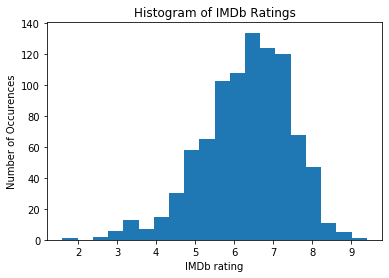

In [86]:
plt.hist(imdb_scores, bins = 20)
plt.xlabel("IMDb rating")
plt.ylabel("Number of Occurences")
plt.title("Histogram of IMDb Ratings")
plt.show()

Not shockingly, this graph shows that the majority of movies fall between a 6 and 7 rating. Not bad, not great, just your average run of the mill movie. Let's take a look at the audience score from Rotten Tomatoes and see if there is a discernible difference.

In [88]:
task_2 = cnx.execute('select audience_score_numeric_RT from movies_total')
RT_scores = []
for row in task_2:
    RT_scores.append(row[0])
RT_scores

[36,
 52,
 30,
 22,
 23,
 58,
 49,
 34,
 60,
 68,
 31,
 33,
 34,
 23,
 73,
 65,
 53,
 79,
 64,
 71,
 44,
 54,
 85,
 75,
 82,
 31,
 36,
 63,
 23,
 42,
 71,
 81,
 30,
 26,
 35,
 78,
 53,
 59,
 82,
 35,
 80,
 31,
 42,
 83,
 44,
 78,
 31,
 66,
 67,
 75,
 33,
 66,
 40,
 71,
 84,
 58,
 33,
 40,
 84,
 46,
 93,
 78,
 79,
 41,
 80,
 7,
 57,
 42,
 63,
 89,
 54,
 70,
 47,
 40,
 12,
 45,
 69,
 65,
 100,
 74,
 65,
 30,
 96,
 42,
 28,
 54,
 85,
 73,
 25,
 92,
 71,
 32,
 89,
 57,
 43,
 62,
 79,
 87,
 73,
 35,
 86,
 41,
 57,
 42,
 54,
 70,
 51,
 47,
 60,
 15,
 73,
 76,
 50,
 73,
 86,
 70,
 100,
 86,
 60,
 74,
 91,
 28,
 74,
 77,
 37,
 79,
 90,
 23,
 46,
 33,
 34,
 42,
 25,
 23,
 79,
 56,
 59,
 3,
 79,
 55,
 50,
 54,
 91,
 83,
 14,
 69,
 76,
 92,
 90,
 91,
 46,
 37,
 85,
 36,
 89,
 57,
 79,
 83,
 66,
 92,
 56,
 79,
 43,
 83,
 39,
 41,
 67,
 62,
 65,
 80,
 31,
 99,
 31,
 100,
 92,
 42,
 30,
 81,
 60,
 36,
 53,
 62,
 67,
 81,
 50,
 26,
 62,
 53,
 78,
 87,
 61,
 23,
 47,
 45,
 63,
 57,
 53,
 16,
 42,
 45,

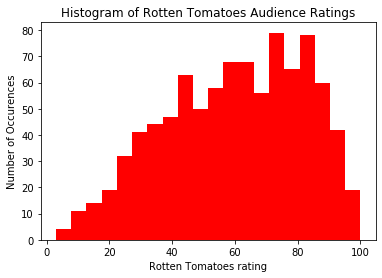

In [91]:
plt.hist(RT_scores, bins = 20, color = 'red')
plt.xlabel("Rotten Tomatoes rating")
plt.ylabel("Number of Occurences")
plt.title("Histogram of Rotten Tomatoes Audience Ratings")
plt.show()

The distribution of Rotten Tomatoes ratings is a little bit difference. There are actually a large number of movies that fall above an 80% rating, where above an 8 is less common for IMDb. I think a large factor in the ratings for these movies is that Rotten Tomatoes provides you with many more options. If you are rating a movie on Rotten Tomatoes, you can choose a value between 0 and 100. On IMDb, you only have the options between 0 and 10. 

One thing that both charts do seem to point out however that there are not many movies that have very low or very high ratings.

It may be easier to compare the two charts if we plot the normalized values together.

In [92]:
task_3 = cnx.execute('select audience_score_normal_imdb from movies_total')
imdb_scores_normal = []
for row in task_3:
    imdb_scores_normal.append(row[0])
imdb_scores_normal

[1.55,
 2.6,
 3.05,
 2.75,
 3.05,
 2.8,
 3.4,
 2.8,
 3.25,
 3.3,
 2.95,
 2.65,
 2.7,
 2.35,
 3.3,
 3.6,
 2.55,
 3.65,
 3.25,
 3.45,
 2.85,
 2.75,
 3.4,
 3.45,
 3.25,
 2.8,
 3.1,
 3.25,
 2.55,
 3.3,
 3.55,
 3.55,
 2.6,
 2.1,
 2.8,
 3.35,
 2.5,
 3.25,
 3.7,
 2.9,
 3.5,
 2.65,
 1.65,
 3.8,
 3.05,
 2.0,
 2.7,
 2.75,
 3.25,
 3.5,
 2.85,
 3.2,
 2.8,
 3.6,
 3.7,
 3.45,
 2.7,
 3.1,
 3.75,
 3.2,
 4.25,
 3.45,
 3.75,
 3.95,
 3.6,
 1.7,
 3.2,
 1.8,
 3.2,
 4.15,
 2.8,
 3.3,
 3.1,
 2.1,
 1.8,
 2.65,
 3.25,
 3.7,
 3.65,
 3.65,
 3.2,
 2.55,
 4.1,
 2.9,
 2.2,
 3.0,
 3.8,
 3.65,
 2.5,
 4.0,
 3.1,
 2.55,
 3.95,
 3.05,
 2.8,
 3.35,
 3.45,
 3.8,
 3.4,
 2.8,
 3.65,
 2.85,
 2.9,
 2.9,
 2.8,
 3.15,
 3.2,
 2.85,
 3.5,
 2.2,
 3.4,
 3.5,
 3.15,
 3.55,
 3.35,
 2.7,
 3.65,
 3.45,
 3.5,
 2.85,
 4.1,
 2.65,
 3.6,
 3.6,
 2.85,
 3.85,
 3.3,
 2.6,
 2.6,
 2.85,
 4.1,
 3.05,
 2.25,
 2.25,
 3.7,
 2.95,
 2.4,
 1.65,
 3.7,
 2.95,
 3.0,
 2.65,
 3.65,
 3.3,
 2.3,
 3.55,
 3.9,
 3.5,
 4.1,
 3.8,
 2.9,
 2.8,
 3.65,
 2.7,
 3.75,

In [93]:
task_4 = cnx.execute('select audience_score_normal_RT from movies_total')
RT_scores_normal = []
for row in task_4:
    RT_scores_normal.append(row[0])
RT_scores_normal

[1.8,
 2.6,
 1.5,
 1.1,
 1.15,
 2.9,
 2.45,
 1.7,
 3.0,
 3.4,
 1.55,
 1.65,
 1.7,
 1.15,
 3.65,
 3.25,
 2.65,
 3.95,
 3.2,
 3.55,
 2.2,
 2.7,
 4.25,
 3.75,
 4.1,
 1.55,
 1.8,
 3.15,
 1.15,
 2.1,
 3.55,
 4.05,
 1.5,
 1.3,
 1.75,
 3.9,
 2.65,
 2.95,
 4.1,
 1.75,
 4.0,
 1.55,
 2.1,
 4.15,
 2.2,
 3.9,
 1.55,
 3.3,
 3.35,
 3.75,
 1.65,
 3.3,
 2.0,
 3.55,
 4.2,
 2.9,
 1.65,
 2.0,
 4.2,
 2.3,
 4.65,
 3.9,
 3.95,
 2.05,
 4.0,
 0.35,
 2.85,
 2.1,
 3.15,
 4.45,
 2.7,
 3.5,
 2.35,
 2.0,
 0.6,
 2.25,
 3.45,
 3.25,
 5.0,
 3.7,
 3.25,
 1.5,
 4.8,
 2.1,
 1.4,
 2.7,
 4.25,
 3.65,
 1.25,
 4.6,
 3.55,
 1.6,
 4.45,
 2.85,
 2.15,
 3.1,
 3.95,
 4.35,
 3.65,
 1.75,
 4.3,
 2.05,
 2.85,
 2.1,
 2.7,
 3.5,
 2.55,
 2.35,
 3.0,
 0.75,
 3.65,
 3.8,
 2.5,
 3.65,
 4.3,
 3.5,
 5.0,
 4.3,
 3.0,
 3.7,
 4.55,
 1.4,
 3.7,
 3.85,
 1.85,
 3.95,
 4.5,
 1.15,
 2.3,
 1.65,
 1.7,
 2.1,
 1.25,
 1.15,
 3.95,
 2.8,
 2.95,
 0.15,
 3.95,
 2.75,
 2.5,
 2.7,
 4.55,
 4.15,
 0.7,
 3.45,
 3.8,
 4.6,
 4.5,
 4.55,
 2.3,
 1.85,
 4.25,
 1.8

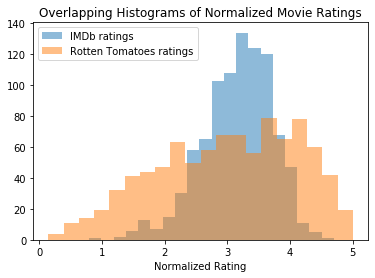

In [97]:
plt.hist(imdb_scores_normal, bins = 20, alpha=0.5, label='IMDb ratings')
plt.hist(RT_scores_normal, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
plt.legend(loc='upper left')
plt.title("Overlapping Histograms of Normalized Movie Ratings")
plt.xlabel("Normalized Rating")
plt.show()

This graph really shows the discrepancies between the two ratings systems. Now what I think would be interesting would be to see how these two graphs compare between different genres of movies. Are there any genres that come closer in these ratings? Are there any that are really skewing this overall data?

In our table, we have 5 columns that depict the different genres of movies: action, comedy, children, thriller, and drama. What I want to start by doing is creating new tables in our database that will represent only movies that fall under one of these categories. 

In [99]:
create_action = cnx.execute('create table action as select * from movies_total where action = 1')

In [100]:
check_action = cnx.execute('select * from action')
for row in check_action:
    print(row)

(70304990, 'Movie', 'good people', 'Henrik Ruben Genz', 'James Franco, Kate Hudson, Tom Wilkinson, Omar Sy, Sam Spruell, Anna Friel, Thomas Arnold, Oliver Dimsdale, Diana Hardcastle, Michael Jibson, Diarmaid Murtagh', 'United States, United Kingdom, Denmark, Sweden', 'September 8, 2017', 2014, 'R', '90 min', 'Action & Adventure, Thrillers', "A struggling couple can't believe their luck when they find a stash of money in the apartment of a neighbor who was recently murdered.", 1.0, 0.0, 0.0, 1.0, 0.0, '12%', '22%', 12, 22, 0.6, 1.1, '5.5', 5.5, 2.75)
(70299204, 'Movie', 'kidnapping mr heineken', 'Daniel Alfredson', 'Jim Sturgess, Sam Worthington, Ryan Kwanten, Anthony Hopkins, Mark van Eeuwen, Thomas Cocquerel, Jemima West, David Dencik', 'Netherlands, Belgium, United Kingdom, United States', 'September 8, 2017', 2015, 'R', '95 min', 'Action & Adventure, Dramas, International Movies', 'When beer magnate Alfred "Freddy" Heineken is kidnapped in 1983, his abductors make the largest ransom

Perfect, it worked! I will now go ahead and create the others!

In [101]:
create_comedy = cnx.execute('create table comedy as select * from movies_total where comedy = 1')
create_children = cnx.execute('create table children as select * from movies_total where children = 1')
create_thriller = cnx.execute('create table thriller as select * from movies_total where thriller = 1')
create_drama = cnx.execute('create table drama as select * from movies_total where drama = 1')

Now we have all 5 tables that we need. For each of these tables, I am going to execute the same statements that we had been running on the table as a whole. I will obtain the normalized scores, append them to a list, and then plot a histogram. We will plot all 5 histograms within the same figure.

In [102]:
action_1 = cnx.execute('select audience_score_normal_imdb from action')
imdb_scores_normal_action = []
for row in action_1:
    imdb_scores_normal_action.append(row[0])

In [103]:
action_2 = cnx.execute('select audience_score_normal_RT from action')
RT_scores_normal_action = []
for row in action_2:
    RT_scores_normal_action.append(row[0])

In [104]:
comedy_1 = cnx.execute('select audience_score_normal_imdb from comedy')
imdb_scores_normal_comedy = []
for row in comedy_1:
    imdb_scores_normal_comedy.append(row[0])

In [105]:
comedy_2 = cnx.execute('select audience_score_normal_RT from comedy')
RT_scores_normal_comedy = []
for row in comedy_2:
    RT_scores_normal_comedy.append(row[0])

In [106]:
children_1 = cnx.execute('select audience_score_normal_imdb from children')
imdb_scores_normal_children = []
for row in children_1:
    imdb_scores_normal_children.append(row[0])

In [107]:
children_2 = cnx.execute('select audience_score_normal_RT from children')
RT_scores_normal_children = []
for row in children_2:
    RT_scores_normal_children.append(row[0])

In [108]:
thriller_1 = cnx.execute('select audience_score_normal_imdb from thriller')
imdb_scores_normal_thriller = []
for row in thriller_1:
    imdb_scores_normal_thriller.append(row[0])

In [109]:
thriller_2 = cnx.execute('select audience_score_normal_RT from thriller')
RT_scores_normal_thriller = []
for row in thriller_2:
    RT_scores_normal_thriller.append(row[0])

In [110]:
drama_1 = cnx.execute('select audience_score_normal_imdb from drama')
imdb_scores_normal_drama = []
for row in drama_1:
    imdb_scores_normal_drama.append(row[0])

In [111]:
drama_2 = cnx.execute('select audience_score_normal_RT from drama')
RT_scores_normal_drama = []
for row in drama_2:
    RT_scores_normal_drama.append(row[0])

Now we have all of our lists of ratings, next step is to plot. 

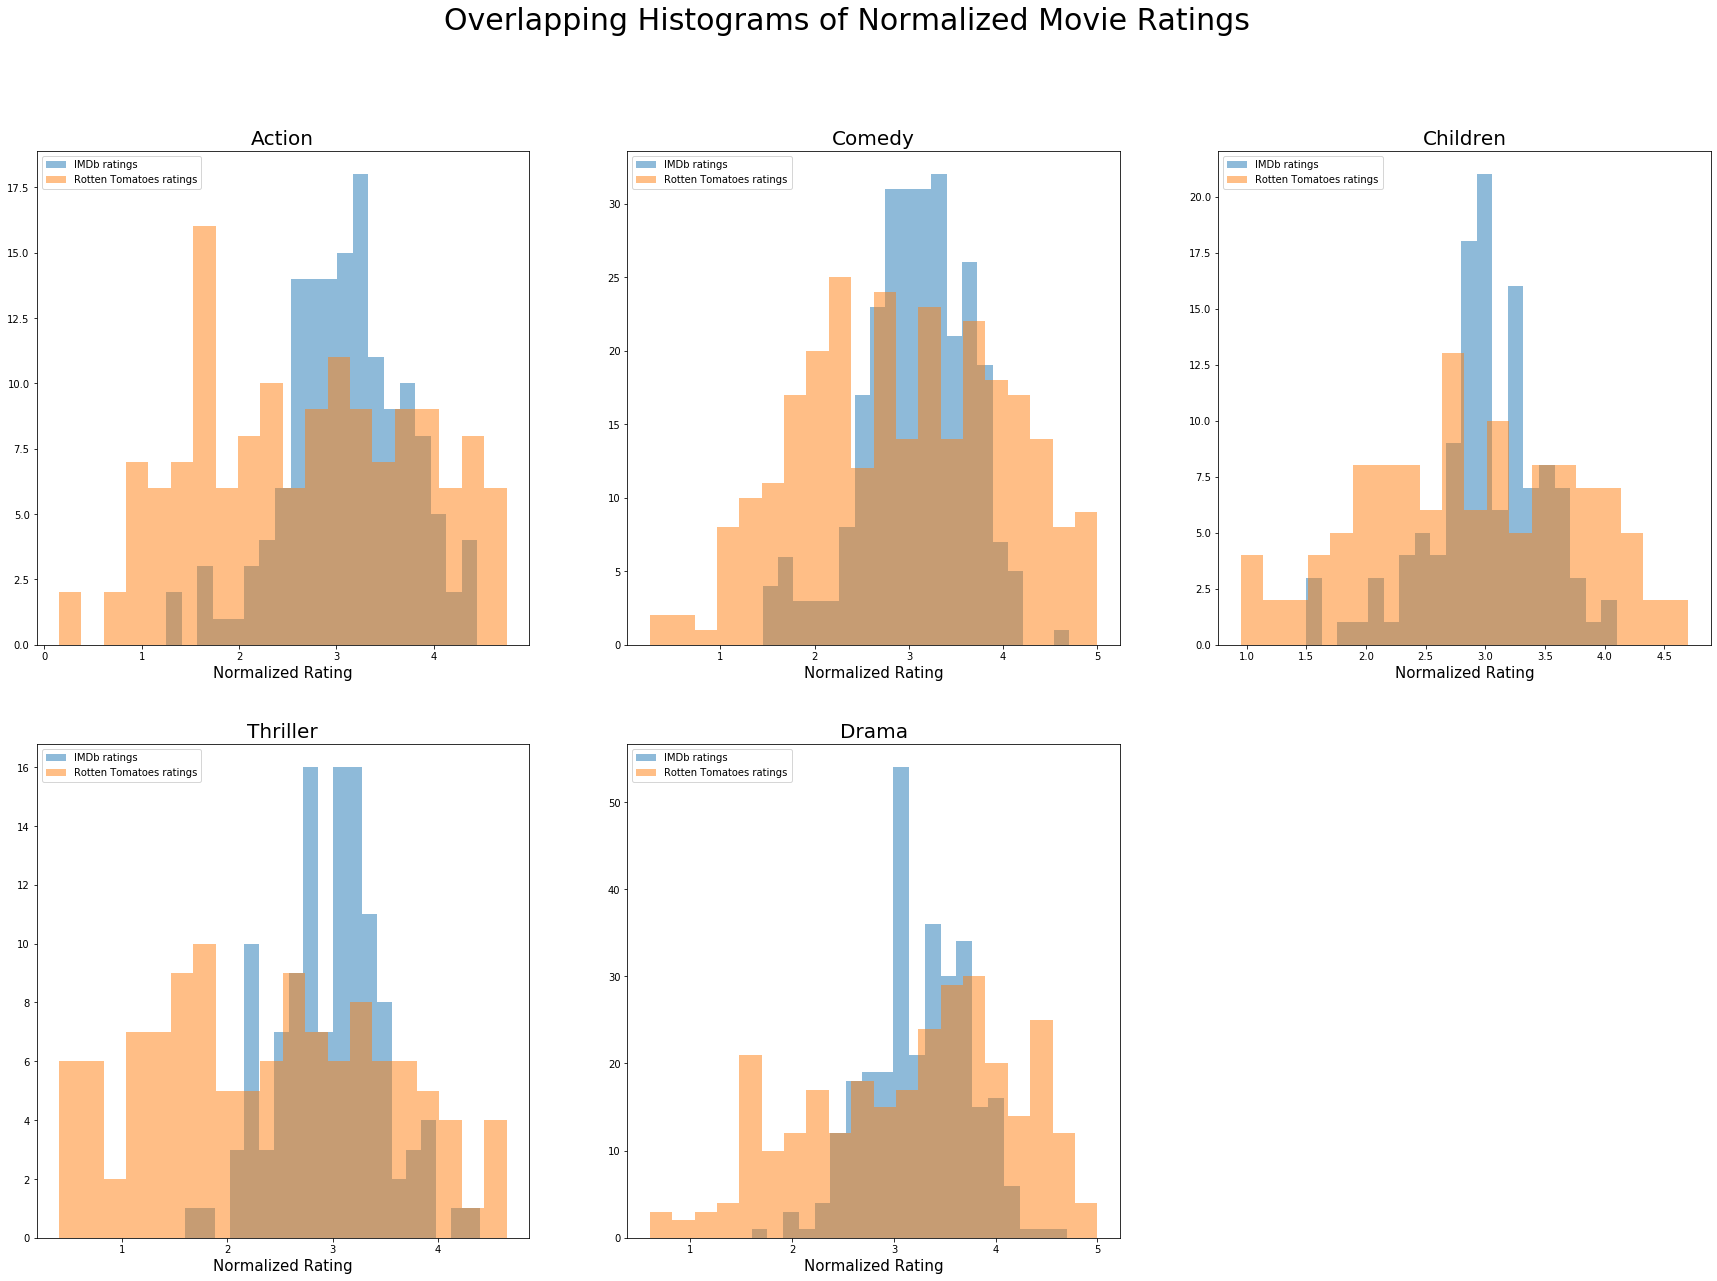

In [121]:
plt.rcParams['figure.figsize'] = (30, 20) 
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.suptitle("Overlapping Histograms of Normalized Movie Ratings", fontsize = 30)

axes[0,0].hist(imdb_scores_normal_action, bins = 20, alpha=0.5, label='IMDb ratings')
axes[0,0].hist(RT_scores_normal_action, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
axes[0,0].legend(loc='upper left')
axes[0,0].set_title("Action", fontsize = 20)
axes[0,0].set_xlabel("Normalized Rating", fontsize = 15)

axes[0,1].hist(imdb_scores_normal_comedy, bins = 20, alpha=0.5, label='IMDb ratings')
axes[0,1].hist(RT_scores_normal_comedy, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
axes[0,1].legend(loc='upper left')
axes[0,1].set_title("Comedy", fontsize = 20)
axes[0,1].set_xlabel("Normalized Rating", fontsize = 15)

axes[0,2].hist(imdb_scores_normal_children, bins = 20, alpha=0.5, label='IMDb ratings')
axes[0,2].hist(RT_scores_normal_children, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
axes[0,2].legend(loc='upper left')
axes[0,2].set_title("Children", fontsize = 20)
axes[0,2].set_xlabel("Normalized Rating", fontsize = 15)

axes[1,0].hist(imdb_scores_normal_thriller, bins = 20, alpha=0.5, label='IMDb ratings')
axes[1,0].hist(RT_scores_normal_thriller, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
axes[1,0].legend(loc='upper left')
axes[1,0].set_title("Thriller", fontsize = 20)
axes[1,0].set_xlabel("Normalized Rating", fontsize = 15)

axes[1,1].hist(imdb_scores_normal_drama, bins = 20, alpha=0.5, label='IMDb ratings')
axes[1,1].hist(RT_scores_normal_drama, bins = 20, alpha=0.5, label='Rotten Tomatoes ratings')
axes[1,1].legend(loc='upper left')
axes[1,1].set_title("Drama", fontsize = 20)
axes[1,1].set_xlabel("Normalized Rating", fontsize = 15)


fig.delaxes(axes[1,2])
plt.show()

Now what can we gather from all of these graphs? In regards to one of my first questions, I don't think we can say that any one genre is affecting the overall distributions. I will say however, Thriller appears to be the most different. There are a lot more low ratings on Rotten Tomatoes than there are on IMDb. IMDb only has one instance of a normalized rating below 2, while Rotten Tomatoes has dozens. 

On the other hand, if you look at genres like Drama and Children, they actually aren't too far off from eachother. Once again however, There are more very low and very high ratings on Rotten Tomatoes. I think it is safe to say that the different ratings scales that the sites use are hard to compare. 

Another interesting idea may be to have these same plots, but instead of plotting them on top of eachother, we plot them against eachother to see if there is any relationship between the two. For instance, if we plot the IMDb rating vs the Rotten Tomatoes rating, you would expect there to be a strong correlation. Let's find out!

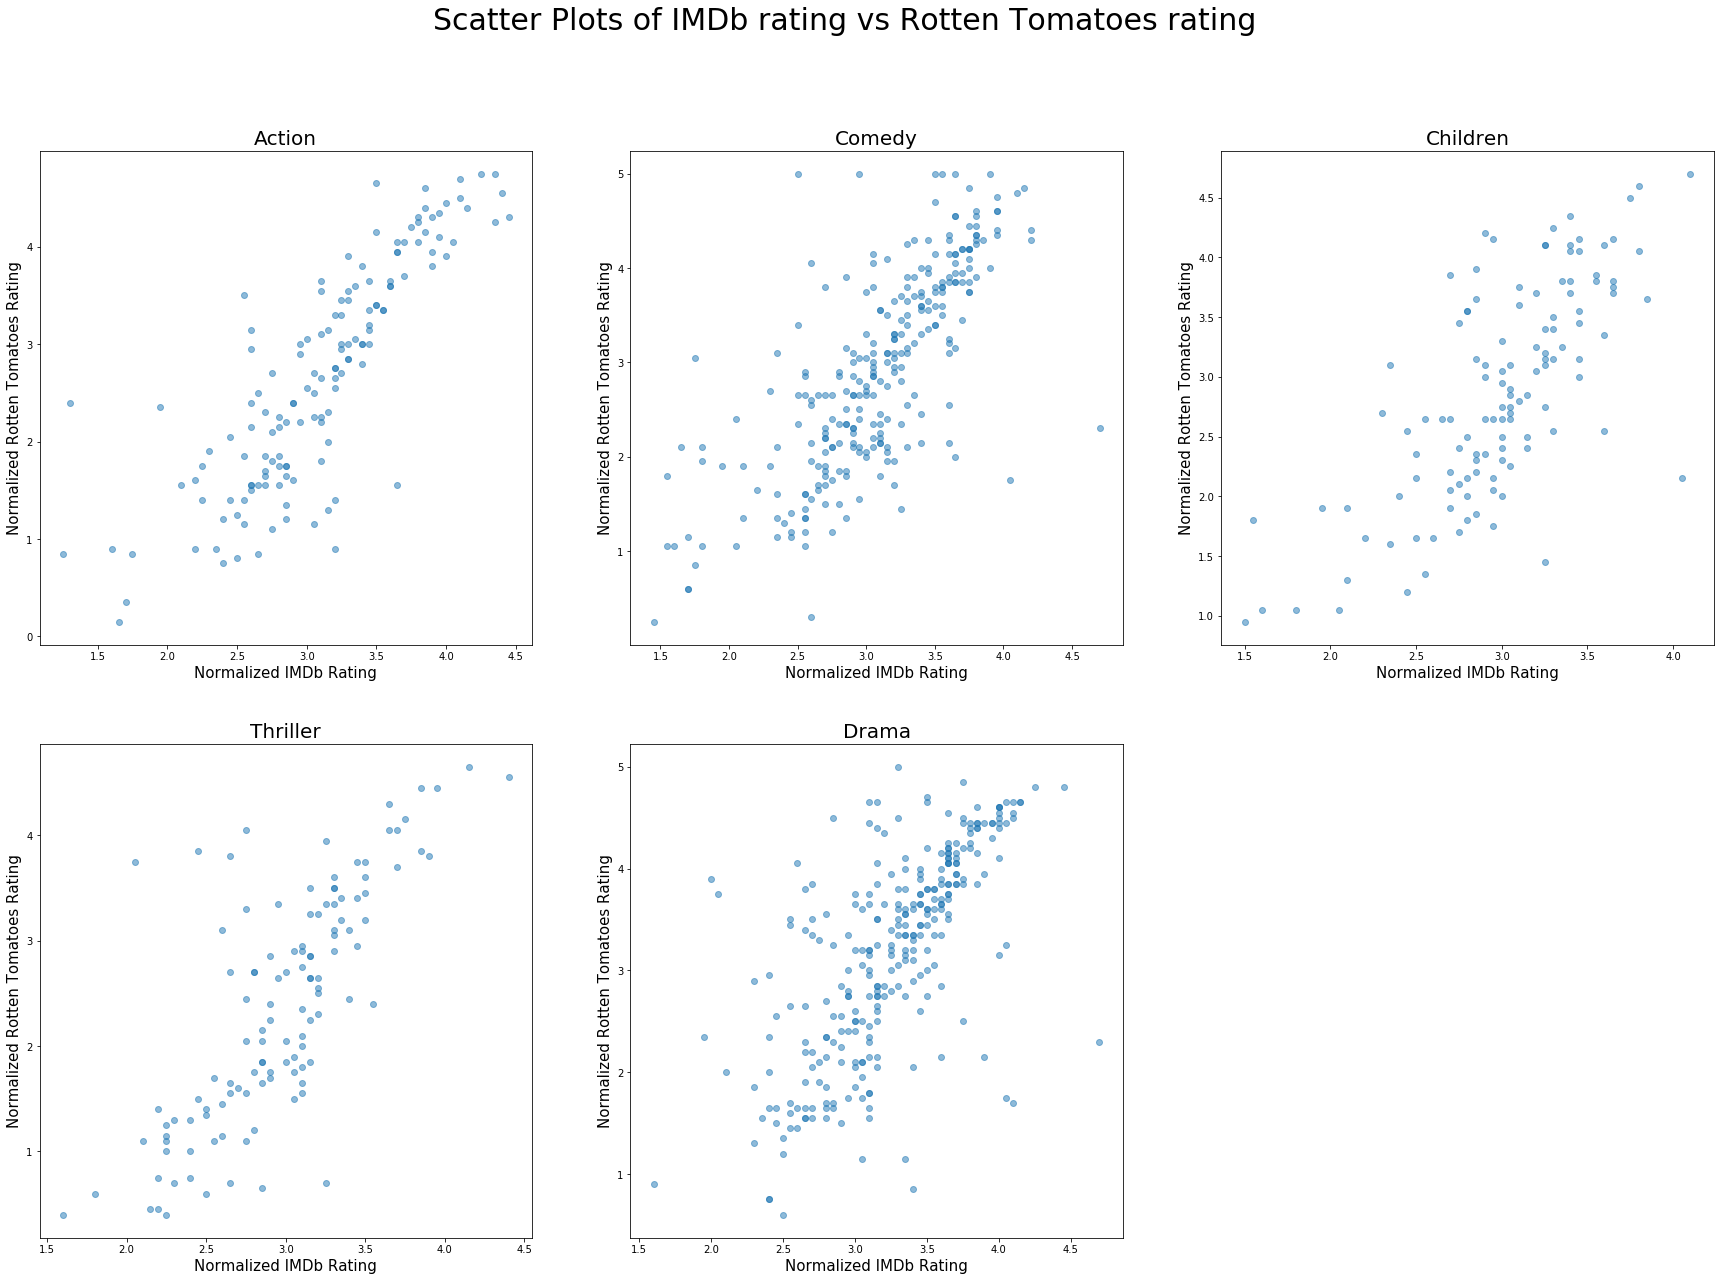

In [126]:
plt.rcParams['figure.figsize'] = (30, 20) 
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.suptitle("Scatter Plots of IMDb rating vs Rotten Tomatoes rating ", fontsize = 30)

axes[0,0].scatter(imdb_scores_normal_action, RT_scores_normal_action, alpha=0.5)
axes[0,0].set_title("Action", fontsize = 20)
axes[0,0].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,0].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

axes[0,1].scatter(imdb_scores_normal_comedy, RT_scores_normal_comedy, alpha=0.5)
axes[0,1].set_title("Comedy", fontsize = 20)
axes[0,1].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,1].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

axes[0,2].scatter(imdb_scores_normal_children, RT_scores_normal_children, alpha=0.5)
axes[0,2].set_title("Children", fontsize = 20)
axes[0,2].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,2].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

axes[1,0].scatter(imdb_scores_normal_thriller, RT_scores_normal_thriller, alpha=0.5)
axes[1,0].set_title("Thriller", fontsize = 20)
axes[1,0].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[1,0].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

axes[1,1].scatter(imdb_scores_normal_drama, RT_scores_normal_drama, alpha=0.5)
axes[1,1].set_title("Drama", fontsize = 20)
axes[1,1].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[1,1].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

fig.delaxes(axes[1,2])
plt.show()

Now these plots do satisfy my hypothesis. For the most part, as IMDb ratings go up, so to do Rotten Tomatoes ratings. One additional step we can take is to fit a linear regression line to our data. This can be accomplished using numpy's polyfit function, which fits a best-fit line to two arrays. We use the outputs from that function (m and b) to plot our line y = m*x + b

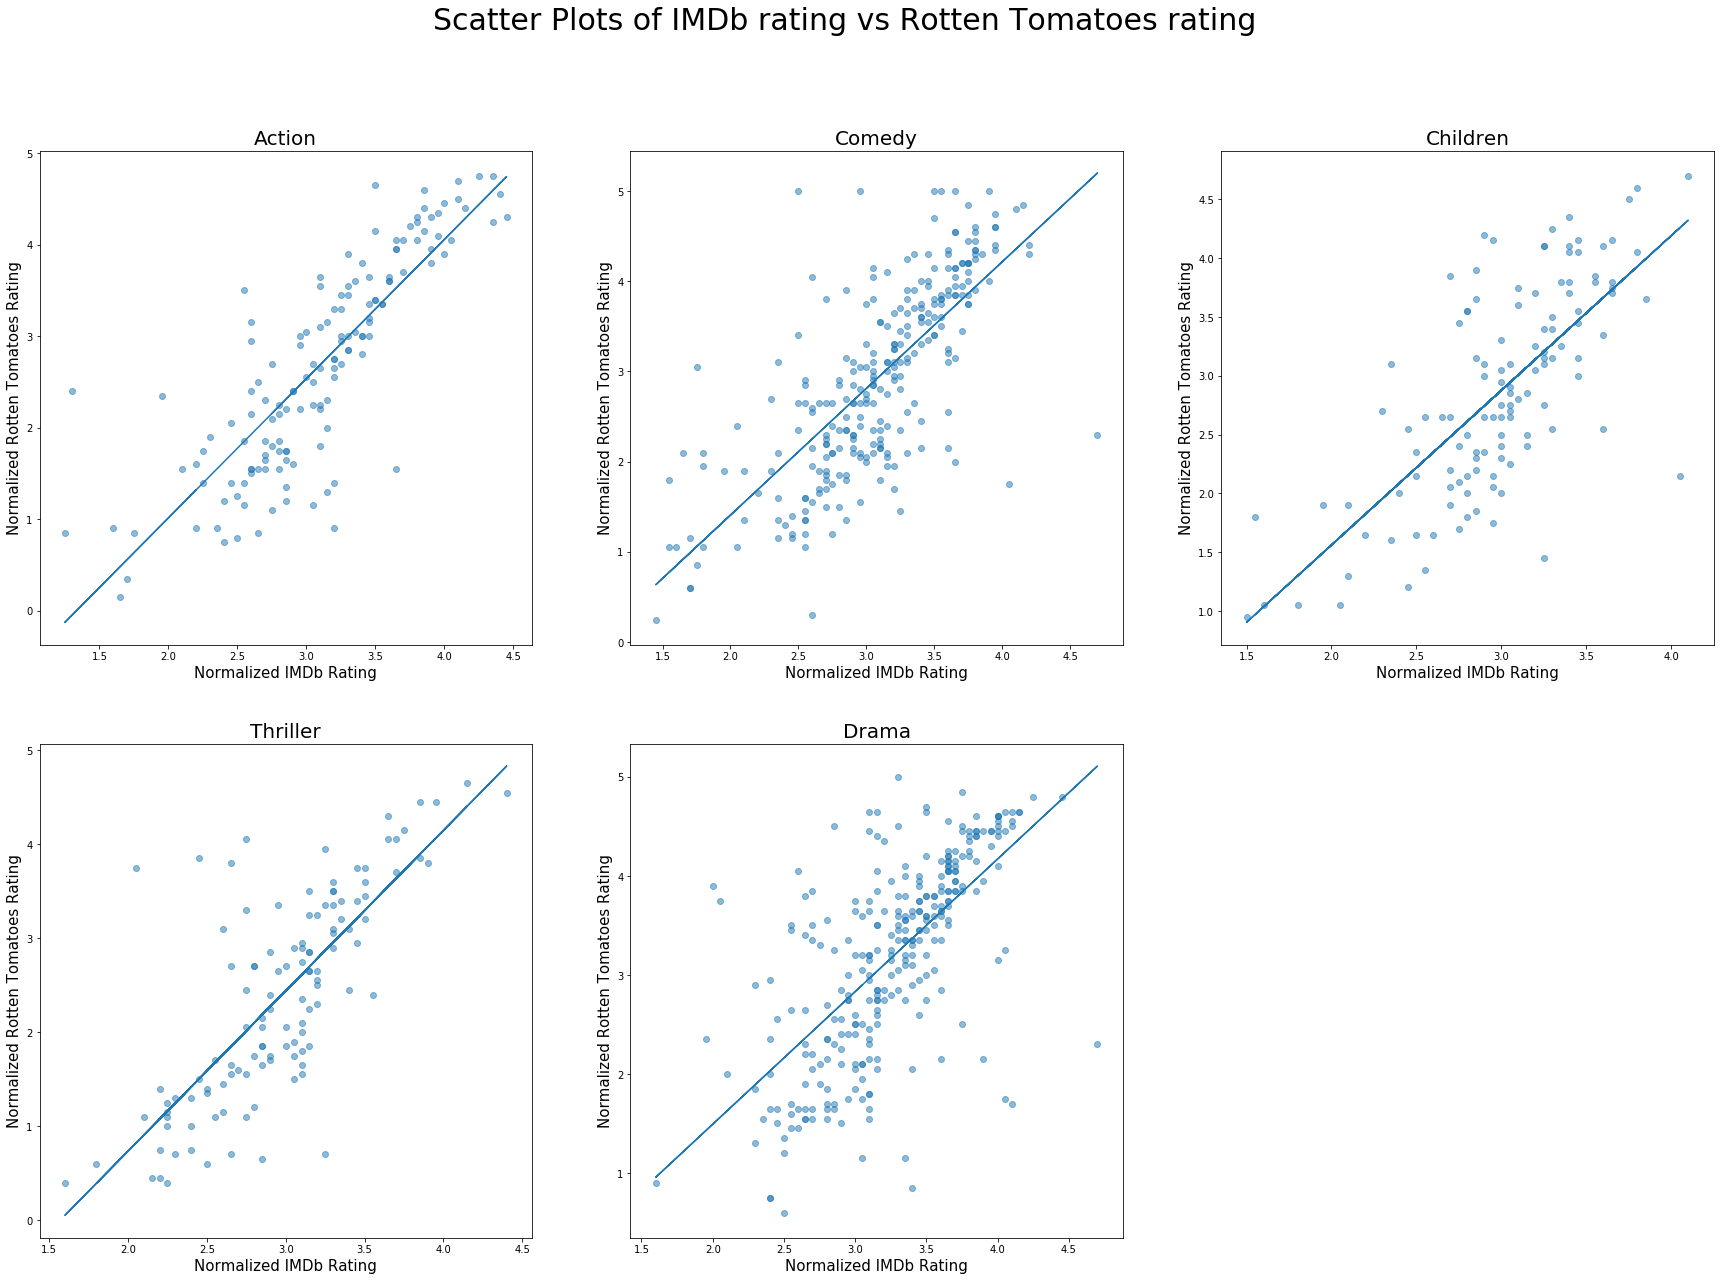

In [128]:
plt.rcParams['figure.figsize'] = (30, 20) 
fig, axes = plt.subplots(nrows = 2, ncols = 3)
fig.suptitle("Scatter Plots of IMDb rating vs Rotten Tomatoes rating ", fontsize = 30)

x_action = np.array(imdb_scores_normal_action)
y_action = np.array(RT_scores_normal_action)
m_action, b_action = np.polyfit(x_action, y_action, 1)
axes[0,0].plot(x_action, m_action*x_action + b_action)
axes[0,0].scatter(imdb_scores_normal_action, RT_scores_normal_action, alpha=0.5)
axes[0,0].set_title("Action", fontsize = 20)
axes[0,0].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,0].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

x_comedy = np.array(imdb_scores_normal_comedy)
y_comedy = np.array(RT_scores_normal_comedy)
m_comedy, b_comedy = np.polyfit(x_comedy, y_comedy, 1)
axes[0,1].plot(x_comedy, m_comedy*x_comedy + b_comedy)
axes[0,1].scatter(imdb_scores_normal_comedy, RT_scores_normal_comedy, alpha=0.5)
axes[0,1].set_title("Comedy", fontsize = 20)
axes[0,1].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,1].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

x_children = np.array(imdb_scores_normal_children)
y_children = np.array(RT_scores_normal_children)
m_children, b_children = np.polyfit(x_children, y_children, 1)
axes[0,2].plot(x_children, m_children*x_children + b_children)
axes[0,2].scatter(imdb_scores_normal_children, RT_scores_normal_children, alpha=0.5)
axes[0,2].set_title("Children", fontsize = 20)
axes[0,2].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[0,2].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

x_thriller = np.array(imdb_scores_normal_thriller)
y_thriller = np.array(RT_scores_normal_thriller)
m_thriller, b_thriller = np.polyfit(x_thriller, y_thriller, 1)
axes[1,0].plot(x_thriller, m_thriller*x_thriller + b_thriller)
axes[1,0].scatter(imdb_scores_normal_thriller, RT_scores_normal_thriller, alpha=0.5)
axes[1,0].set_title("Thriller", fontsize = 20)
axes[1,0].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[1,0].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

x_drama = np.array(imdb_scores_normal_drama)
y_drama = np.array(RT_scores_normal_drama)
m_drama, b_drama = np.polyfit(x_drama, y_drama, 1)
axes[1,1].plot(x_drama, m_drama*x_drama + b_drama)
axes[1,1].scatter(imdb_scores_normal_drama, RT_scores_normal_drama, alpha=0.5)
axes[1,1].set_title("Drama", fontsize = 20)
axes[1,1].set_xlabel("Normalized IMDb Rating", fontsize = 15)
axes[1,1].set_ylabel("Normalized Rotten Tomatoes Rating", fontsize = 15)

fig.delaxes(axes[1,2])
plt.show()

And voila! We can see it even more clearly that there is a positive linear relationship between these data points, with many actually intersecting the line for each genre.